In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acovf, acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Zadanie 1


In [ ]:
#df1 = pd.read_csv("archiwum_tab_a_2025.csv", encoding='Latin2', sep=';')

In [ ]:
#df2 = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [351]:
df = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [352]:
df = df.iloc[1:-3]

In [ ]:
#df2 = df2.iloc[1:-3]
#df1 = df1.iloc[1:-3]

In [ ]:
#df = pd.concat([df2, df1])

In [353]:
df

,data,1THB,1USD,1AUD,1HKD,1CAD,1NZD,1SGD,1EUR,100HUF,...,1BRL,1MYR,10000IDR,100INR,100KRW,1CNY,1XDR,nr tabeli,pełny numer tabeli,Unnamed: 36
1,20240102,"0,1155","3,9432","2,6897","0,5046","2,9752","2,4884","2,9809","4,3434","1,1365",...,"0,8125","0,8567","2,5489","4,7327","0,3032","0,5525","5,2882",1.0,001/A/NBP/2024,NaN
2,20240103,"0,1162","3,9909","2,6932","0,5112","2,9947","2,4961","3,0074","4,3646","1,1462",...,"0,8105","0,8618","2,5781","4,7914","0,3050","0,5585","5,3351",2.0,002/A/NBP/2024,NaN
3,20240104,"0,1152","3,9684","2,6760","0,5083","2,9785","2,4849","2,9900","4,3525","1,1468",...,"0,8065","0,8563","2,5619","4,7676","0,3036","0,5552","5,3260",3.0,003/A/NBP/2024,NaN
4,20240105,"0,1148","3,9850","2,6627","0,5101","2,9797","2,4778","2,9925","4,3484","1,1498",...,"0,8136","0,8562","2,5682","4,7907","0,3023","0,5569","5,3070",4.0,004/A/NBP/2024,NaN
5,20240108,"0,1137","3,9812","2,6668","0,5099","2,9761","2,4819","2,9922","4,3548","1,1528",...,"0,8167","0,8560","2,5644","4,7886","0,3020","0,5559","5,3215",5.0,005/A/NBP/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,20241223,"0,1197","4,0950","2,5629","0,5271","2,8475","2,3167","3,0209","4,2621","1,0278",...,"0,6735","0,9120","2,5317","4,8113","0,2821","0,5610","5,3493",248.0,248/A/NBP/2024,NaN
249,20241224,"0,1204","4,1127","2,5647","0,5295","2,8571","2,3194","3,0256","4,2739","1,0364",...,"0,6639","0,9166","2,5403","4,8273","0,2817","0,5635","5,3630",249.0,249/A/NBP/2024,NaN
250,20241227,"0,1203","4,1036","2,5483","0,5287","2,8492","2,3092","3,0166","4,2747","1,0401",...,"0,6639","0,9177","2,5276","4,7968","0,2779","0,5622","5,3640",250.0,250/A/NBP/2024,NaN
251,20241230,"0,1201","4,0960","2,5494","0,5278","2,8464","2,3157","3,0177","4,2738","1,0392",...,"0,6610","0,9170","2,5386","4,7888","0,2778","0,5611","5,3629",251.0,251/A/NBP/2024,NaN


In [354]:
df = df[["data", "1USD", "1EUR", "1GBP"]]

In [356]:
df.columns = ["date", "USD", "EUR", "GBP"]

In [357]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")


C:\Users\Rafal\AppData\Local\Temp\ipykernel_17400\2752413111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")


In [358]:
df["date"].isna().sum()

0

In [362]:
df["USD"] = df["USD"].str.replace(",", ".").astype(float)
df["EUR"] = df["EUR"].str.replace(",", ".").astype(float)
df["GBP"] = df["GBP"].str.replace(",", ".").astype(float)

AttributeError: Can only use .str accessor with string values!

In [363]:
df = df.reset_index(drop=True)
df.index = df.index + 1

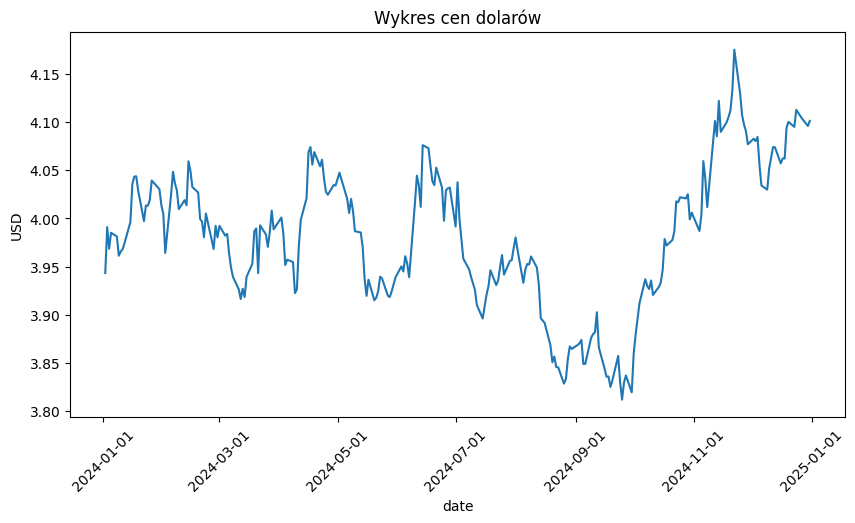

In [364]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="USD", data=df)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen dolarów")
plt.show()

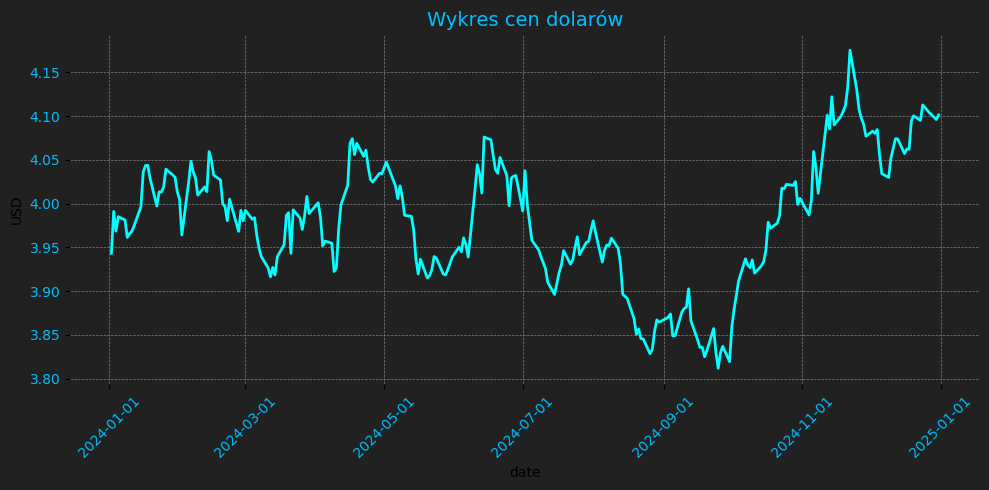

In [365]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="USD", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres cen dolarów", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


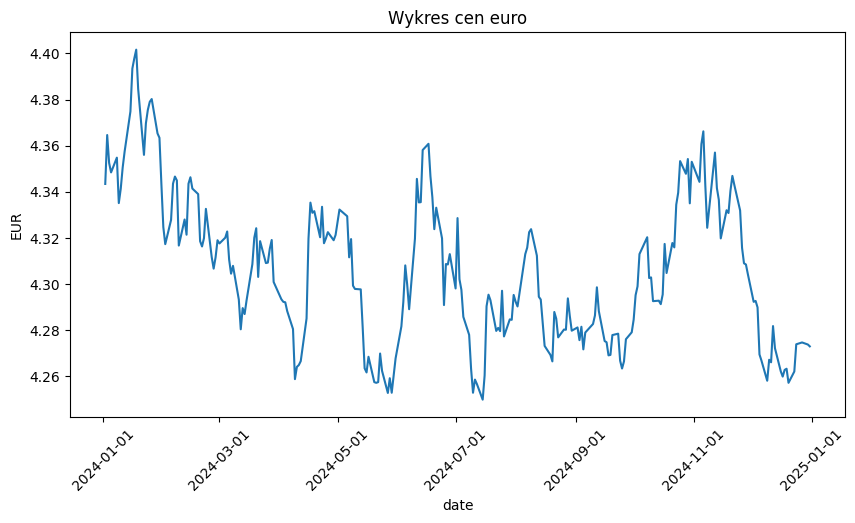

In [366]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen euro")
plt.show()

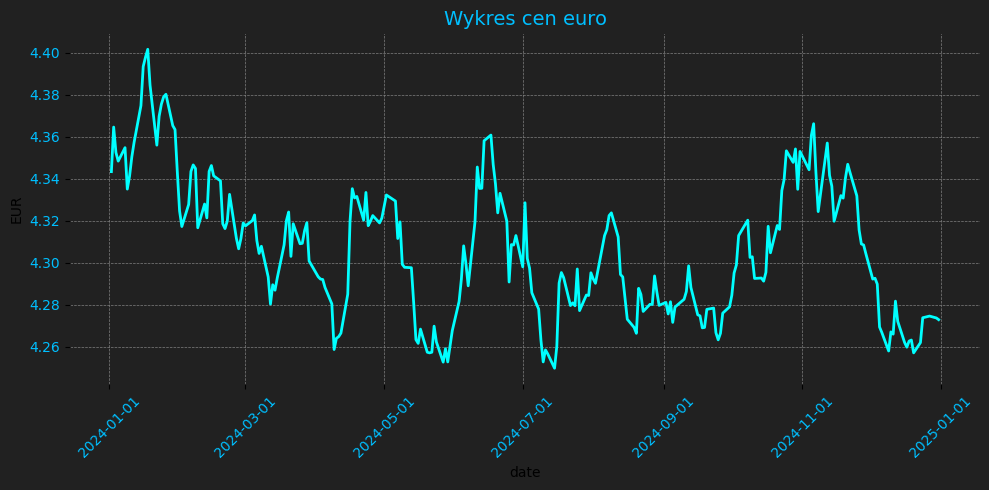

In [367]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="EUR", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres cen euro", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


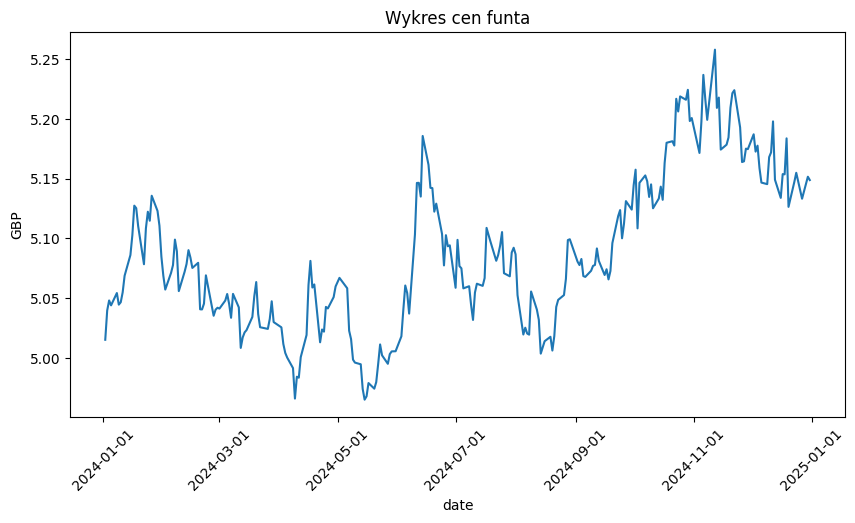

In [368]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="GBP")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen funta")
plt.show()

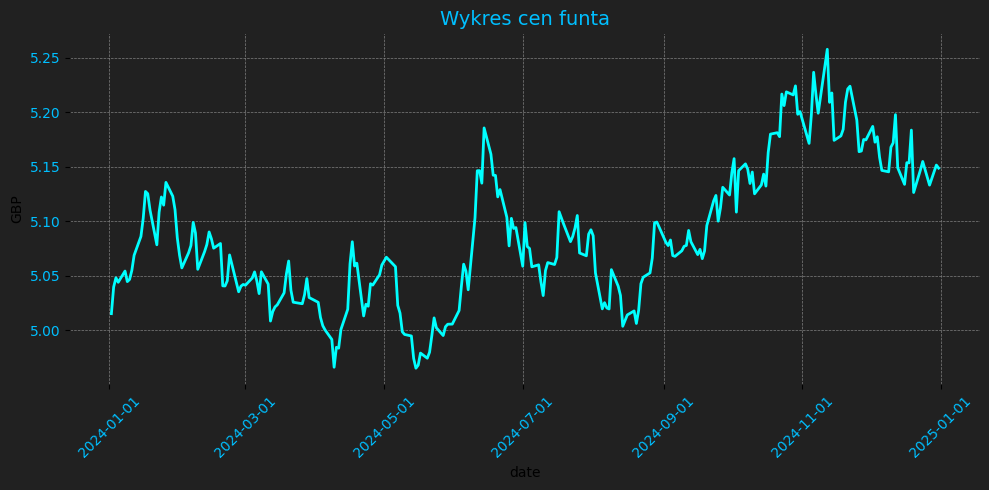

In [369]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="GBP", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres cen funta", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


In [370]:
df["returns_USD"] = np.log(1 + df["USD"].pct_change()) * 100
df["returns_EUR"] = np.log(1 + df["EUR"].pct_change()) * 100
df["returns_GBP"] = np.log(1 + df["GBP"].pct_change()) * 100

In [371]:
"""df["returns_USD"] = df["USD"].pct_change() * 100
df["returns_EUR"] = df["EUR"].pct_change() * 100
df["returns_GBP"] = df["GBP"].pct_change() * 100"""

'df["returns_USD"] = df["USD"].pct_change() * 100\ndf["returns_EUR"] = df["EUR"].pct_change() * 100\ndf["returns_GBP"] = df["GBP"].pct_change() * 100'

In [372]:
df.dropna(inplace=True)

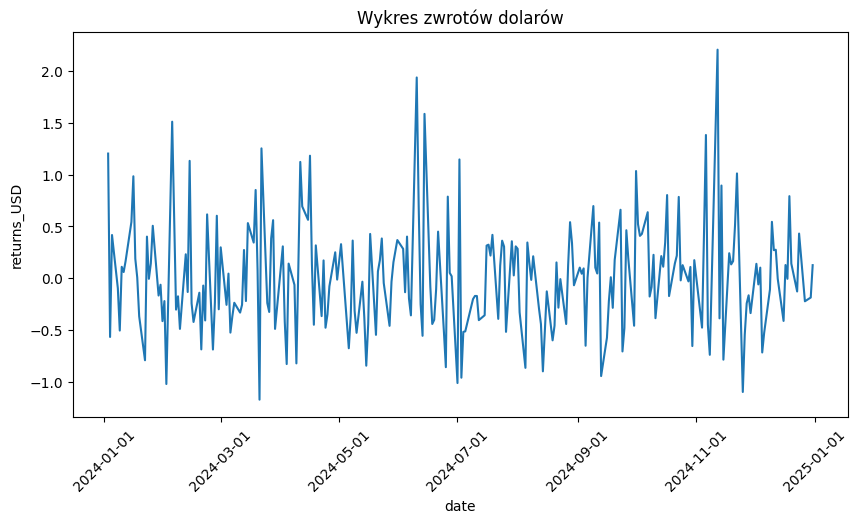

In [373]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_USD")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów dolarów")
plt.show()

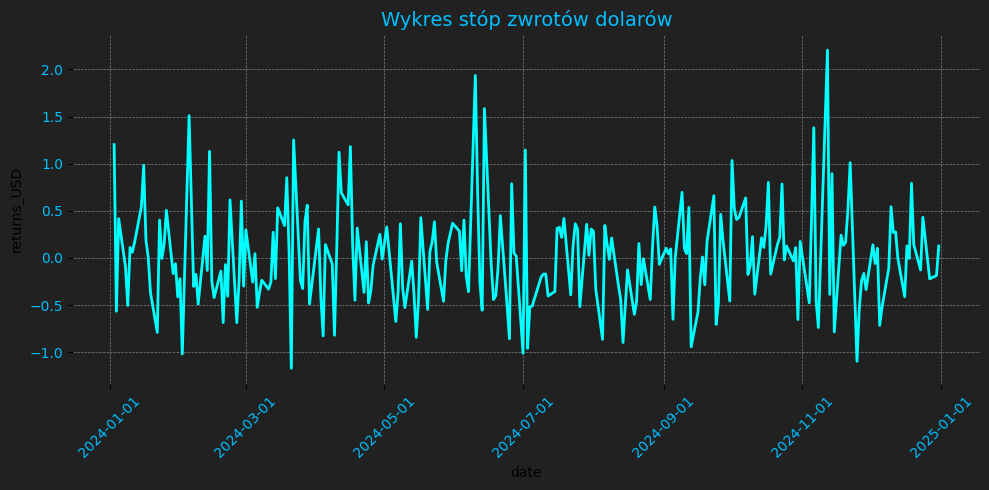

In [374]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="returns_USD", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów dolarów", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


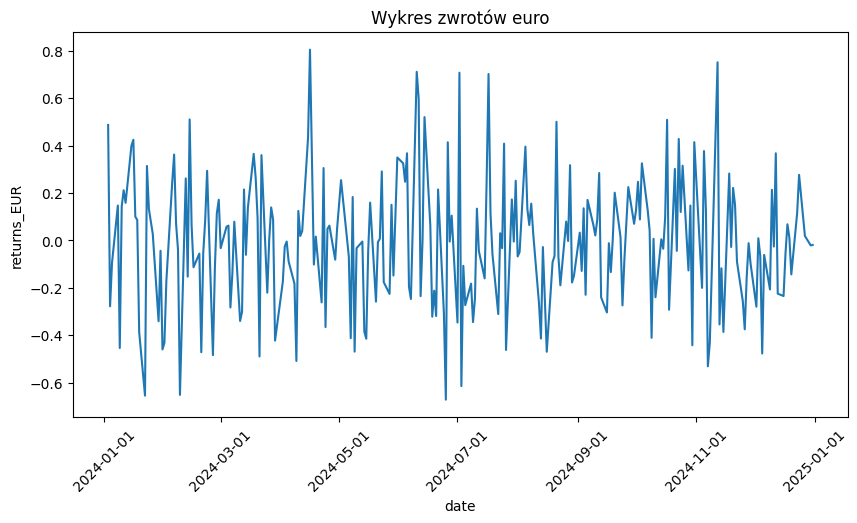

In [375]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów euro")
plt.show()

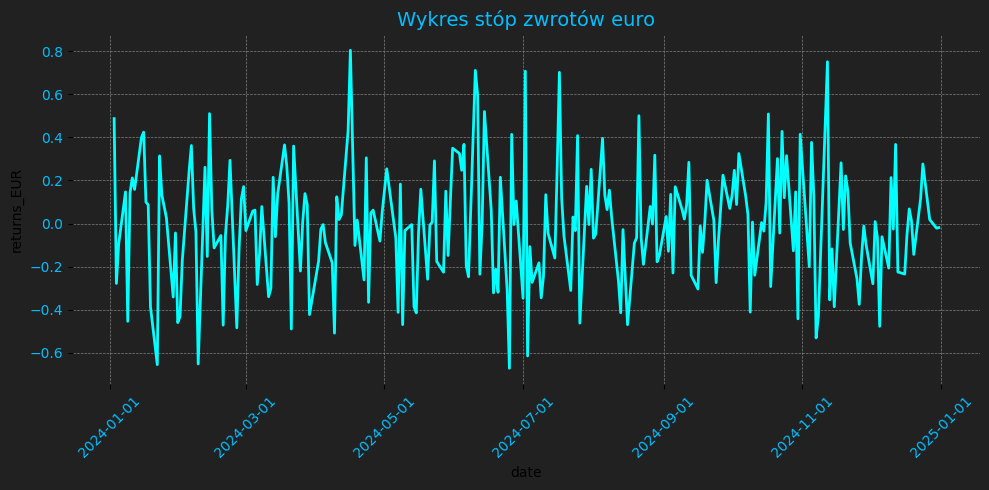

In [376]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="returns_EUR", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów euro", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


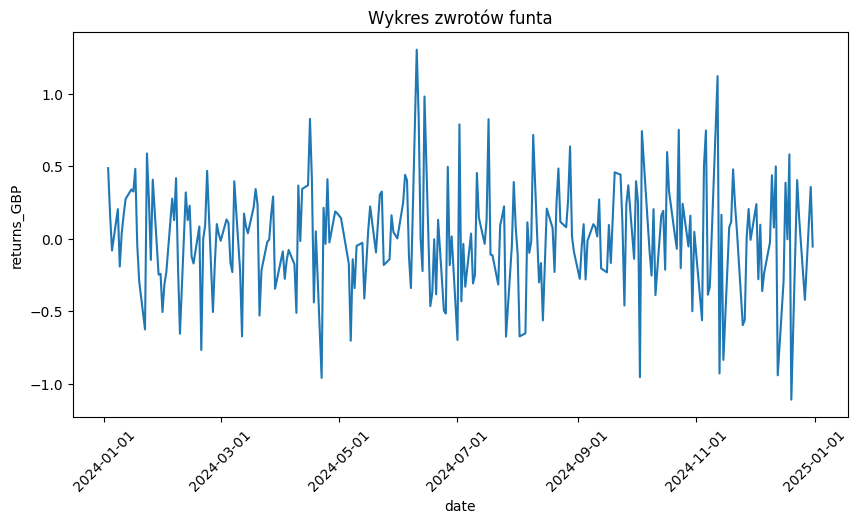

In [377]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_GBP")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów funta")
plt.show()

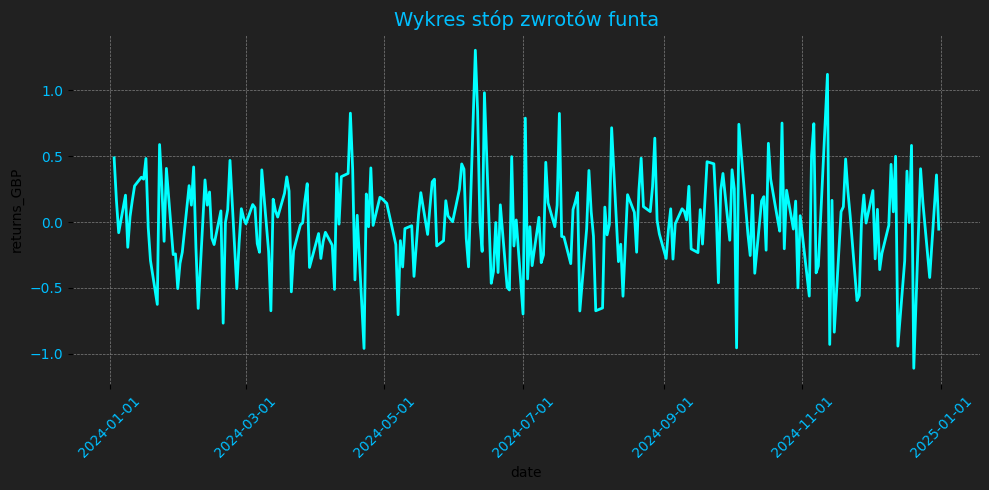

In [378]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="returns_GBP", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów funta", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


Odchylenie standardowe

In [379]:
usd_std = df["returns_USD"].std()
eur_std = df["returns_EUR"].std()
gbp_std = df["returns_GBP"].std()
print(usd_std, eur_std, gbp_std)

0.5295166530142577 0.27558913058207124 0.37859002385859003


Wariancja

In [380]:
usd_var = df["returns_USD"].var()
eur_var = df["returns_EUR"].var()
gbp_var = df["returns_GBP"].var()
print(usd_var, eur_var, gbp_var)

0.2803878858194217 0.07594936889498193 0.14333040616524778


Annualizowane odchylenie standardowe

In [381]:
annualized_usd_std = usd_std * np.sqrt(252) 
annualized_eur_std = eur_std * np.sqrt(252) 
annualized_gbp_std = gbp_std * np.sqrt(252)
print(f"Annualizowane std USD: {annualized_usd_std:.2f}%\nAnnualizowane std EUR: {annualized_eur_std:.2f}%\nAnnualizowane std GBP: {annualized_gbp_std:.2f}%")

Annualizowane std USD: 8.41%
Annualizowane std EUR: 4.37%
Annualizowane std GBP: 6.01%


Średnie

In [382]:
usd_mean = df["returns_USD"].mean()
eur_mean = df["returns_EUR"].mean()
gbp_mean = df["returns_GBP"].mean()
print(usd_mean, eur_mean, gbp_mean)

0.015652206137357492 -0.006510476049053979 0.010474253720440155


Semi std

In [383]:
below_mean_usd = df[df['returns_USD'] < usd_mean]
below_mean_eur = df[df['returns_EUR'] < eur_mean]
below_mean_gbp = df[df['returns_GBP'] < gbp_mean]

semi_std_usd = np.std(below_mean_usd['returns_USD'], ddof=1)
semi_std_eur = np.std(below_mean_eur['returns_EUR'], ddof=1) 
semi_std_gbp = np.std(below_mean_gbp['returns_GBP'], ddof=1)

print(f"Semi std USD: {semi_std_usd:.2f}%\nSemi std EUR: {semi_std_eur:.2f}%\nSemi std GBP: {semi_std_gbp:.2f}%")

Semi std USD: 0.27%
Semi std EUR: 0.17%
Semi std GBP: 0.25%


IQR

In [384]:
iqr_usd = df["returns_USD"].quantile(0.75) - df["returns_USD"].quantile(0.25)
iqr_eur = df["returns_EUR"].quantile(0.75) - df["returns_EUR"].quantile(0.25)
iqr_gbp = df["returns_GBP"].quantile(0.75) - df["returns_GBP"].quantile(0.25)

In [385]:
print(iqr_usd, iqr_eur, iqr_gbp)

0.6770388322919013 0.34055934388662473 0.45577664056839196


CV (Coefficient of Variation)

In [386]:
cv_usd = usd_std / abs(usd_mean)
cv_eur = eur_std / abs(eur_mean)
cv_gbp = gbp_std / abs(gbp_mean)

In [387]:
print(cv_usd, cv_eur, cv_gbp)


33.83016096053372 42.330104358822794 36.144820811413446


Dekompozycja - nie trzeba stacjonarne

In [206]:
def adfuller_test(series, sig = 0.05):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

In [207]:
adfuller_test(df["returns_USD"])
adfuller_test(df["returns_EUR"])
adfuller_test(df["returns_GBP"])

Statystyka testowa = -16.901, p-Value = 0.0 => Stationary. 
Statystyka testowa = -16.036, p-Value = 0.0 => Stationary. 
Statystyka testowa = -17.269, p-Value = 0.0 => Stationary. 


Histogramy

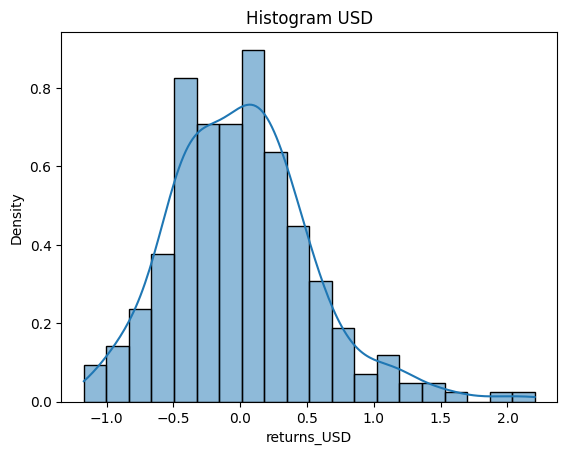

In [208]:
sns.histplot(data=df, x="returns_USD", stat="density",kde = True, bins=20)
plt.title("Histogram USD")
plt.show()

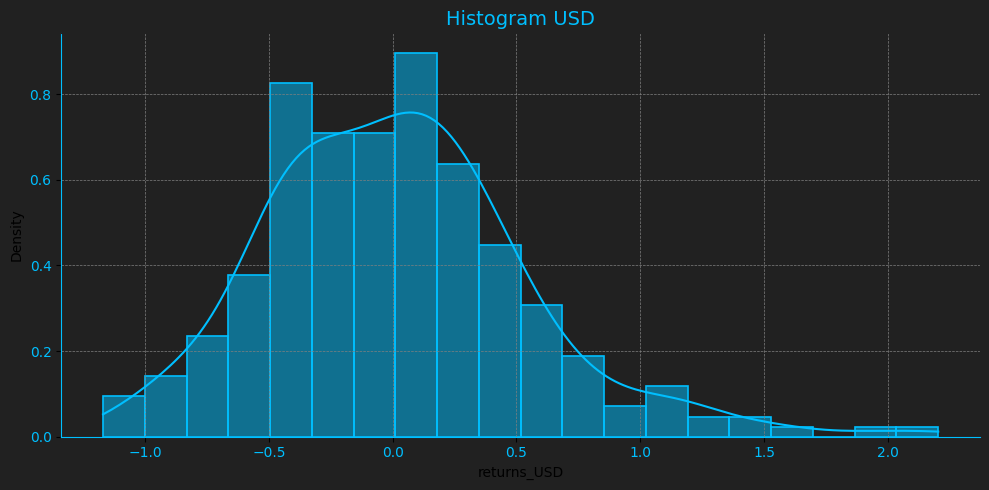

In [209]:
fig, ax = plt.subplots(figsize=(10, 5))

# Ustawienia tła
fig.patch.set_facecolor('#212121')
ax.set_facecolor('#212121')

# Histogram z KDE
sns.histplot(
    data=df, 
    x="returns_USD", 
    stat="density", 
    kde=True, 
    bins=20, 
    color="deepskyblue", 
    edgecolor="#00bfff", 
    linewidth=1.2,
    ax=ax
)

# Tytuł i osie
plt.title("Histogram USD", color='deepskyblue', fontsize=14)
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Ramki
ax.spines['bottom'].set_color('deepskyblue')
ax.spines['left'].set_color('deepskyblue')
ax.spines['top'].set_color('#212121')   # ukrycie
ax.spines['right'].set_color('#212121') # ukrycie

# Siatka
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Dostosowanie
plt.tight_layout()
plt.show()

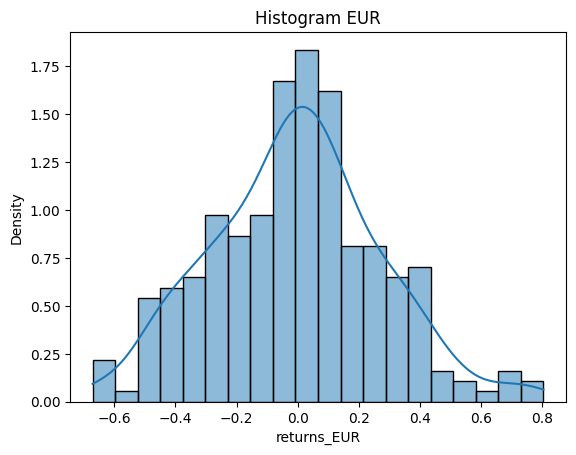

In [210]:
sns.histplot(data=df, x="returns_EUR", stat="density",kde = True, bins=20)
plt.title("Histogram EUR")
plt.show()

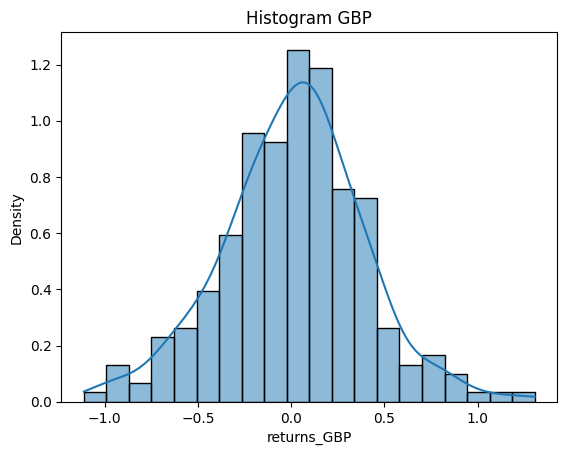

In [211]:
sns.histplot(data=df, x="returns_GBP", stat="density",kde = True, bins=20)
plt.title("Histogram GBP")
plt.show()

Kwantyle

In [388]:
quantiles = [0.05, 0.5, 0.95, 0.975]
result = df[["returns_USD", "returns_EUR", "returns_GBP"]].quantile(q=quantiles)
result = result.T
result.columns = [f"Q{int(q*1000)/10}" for q in quantiles]
print(result)

                 Q5.0     Q50.0     Q95.0     Q97.5
returns_USD -0.787084 -0.004984  0.997298  1.197259
returns_EUR -0.460626 -0.004642  0.425996  0.517469
returns_GBP -0.654885  0.025093  0.593663  0.780257


Dystrybuanty

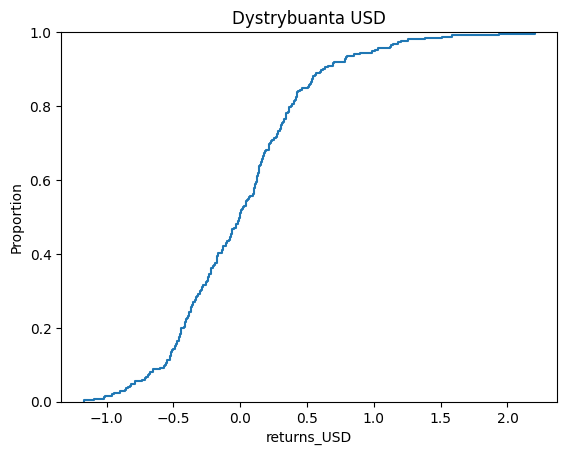

In [213]:
sns.ecdfplot(data=df, x="returns_USD")
plt.title("Dystrybuanta USD")
plt.show()

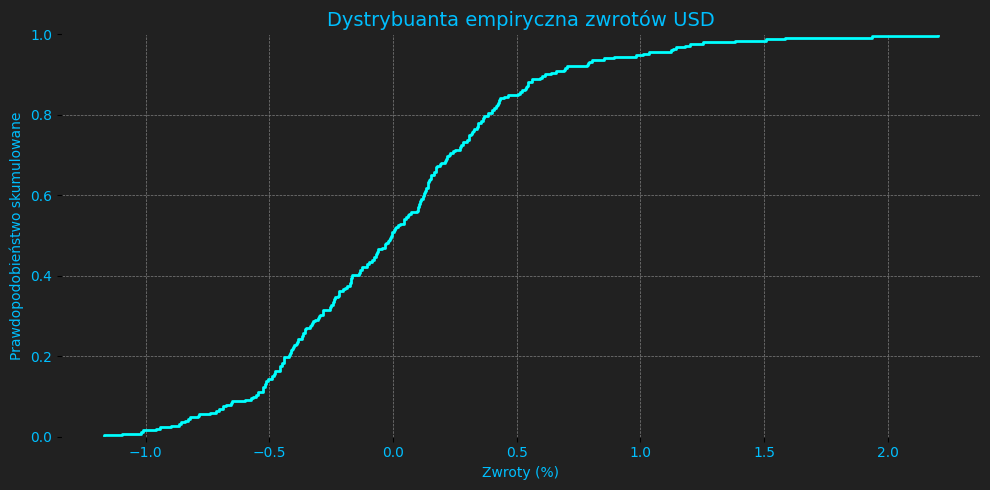

In [214]:
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Wykres dystrybuanty empirycznej
sns.ecdfplot(data=df, x="returns_USD", color="cyan", linewidth=2, ax=ax)

# Tytuł i osie
plt.title("Dystrybuanta empiryczna zwrotów USD", color='deepskyblue', fontsize=14)
plt.xlabel("Zwroty (%)", color='deepskyblue')
plt.ylabel("Prawdopodobieństwo skumulowane", color='deepskyblue')

# Kolory etykiet
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Siatka i ramki
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')
ax.spines['right'].set_color('#212121')

# Dostosowanie układu
plt.tight_layout()
plt.show()

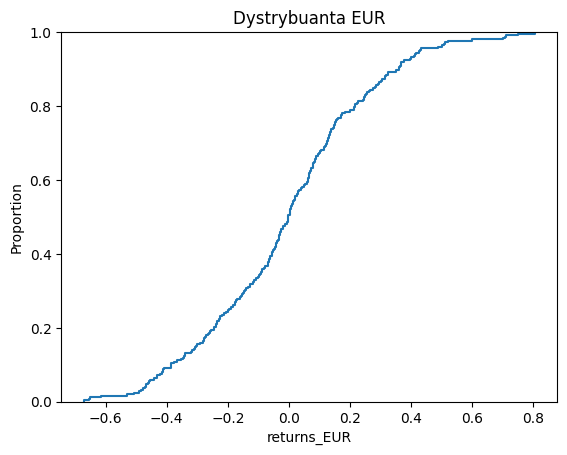

In [215]:
sns.ecdfplot(data=df, x="returns_EUR")
plt.title("Dystrybuanta EUR")
plt.show()

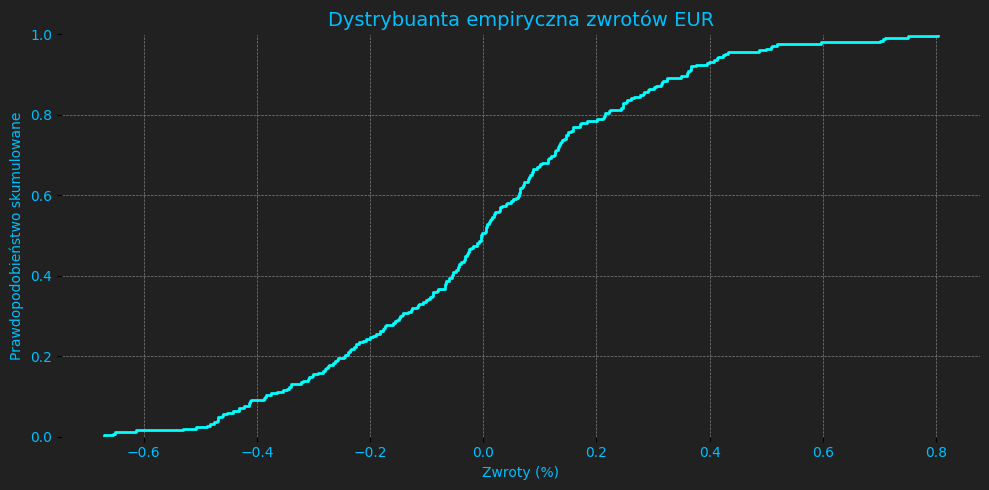

In [216]:
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Wykres dystrybuanty empirycznej
sns.ecdfplot(data=df, x="returns_EUR", color="cyan", linewidth=2, ax=ax)

# Tytuł i osie
plt.title("Dystrybuanta empiryczna zwrotów EUR", color='deepskyblue', fontsize=14)
plt.xlabel("Zwroty (%)", color='deepskyblue')
plt.ylabel("Prawdopodobieństwo skumulowane", color='deepskyblue')

# Kolory etykiet
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Siatka i ramki
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')
ax.spines['right'].set_color('#212121')

# Dostosowanie układu
plt.tight_layout()
plt.show()

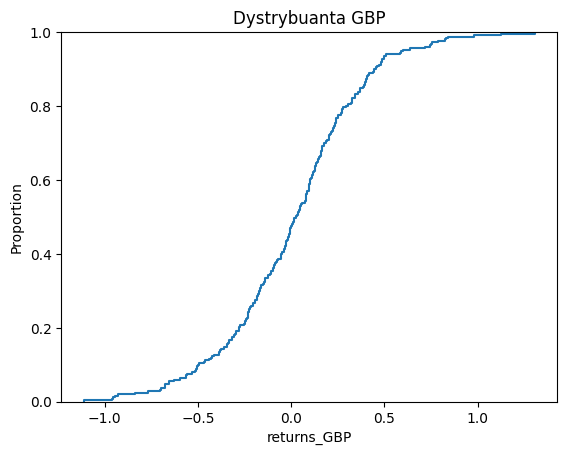

In [217]:
sns.ecdfplot(data=df, x="returns_GBP")
plt.title("Dystrybuanta GBP")
plt.show()

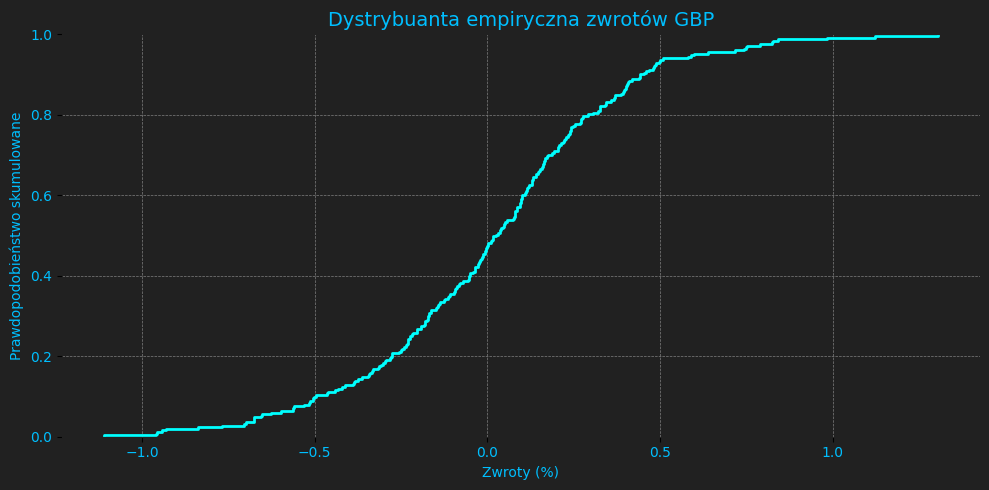

In [218]:
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Wykres dystrybuanty empirycznej
sns.ecdfplot(data=df, x="returns_GBP", color="cyan", linewidth=2, ax=ax)

# Tytuł i osie
plt.title("Dystrybuanta empiryczna zwrotów GBP", color='deepskyblue', fontsize=14)
plt.xlabel("Zwroty (%)", color='deepskyblue')
plt.ylabel("Prawdopodobieństwo skumulowane", color='deepskyblue')

# Kolory etykiet
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Siatka i ramki
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')
ax.spines['right'].set_color('#212121')

# Dostosowanie układu
plt.tight_layout()
plt.show() 

In [219]:
thresholds = [-0.01, -0.005, 0, 0.005, 0.01]
cdf_result = pd.DataFrame(index=thresholds)

for col in ["returns_USD", "returns_EUR", "returns_GBP"]:
    cdf_result[col] = [ (df[col] <= t).mean() for t in thresholds ]

cdf_result = cdf_result.T
cdf_result.columns = [f"F({t})" for t in thresholds]

print(cdf_result)


             F(-0.01)  F(-0.005)      F(0)  F(0.005)   F(0.01)
returns_USD  0.494024   0.498008  0.509960  0.509960  0.517928
returns_EUR  0.482072   0.486056  0.505976  0.521912  0.533865
returns_GBP  0.454183   0.462151  0.474104  0.482072  0.482072


In [220]:
import scipy.stats as stats
from scipy.stats import norm

# Dopasowanie rozkładu normalnego
mu, std = stats.norm.fit(df['returns_USD'].dropna())
print("Dopasowany rozkład normalny (USD): μ =", mu, ", σ =", std)

# Dopasowanie t-Studenta
df_t, loc_t, scale_t = stats.t.fit(df['returns_USD'].dropna())
print("Dopasowany rozkład t-Studenta: df =", df_t, ", loc =", loc_t, ", scale =", scale_t)

# Można dopasować inne rozkłady np. Laplace, lognormal, Cauchy itd.
std_ann = std * np.sqrt(252)
semi_std = std * np.sqrt(0.5)
iqr = norm.ppf(0.75, mu, std) - norm.ppf(0.25, mu, std)
cv = std / abs(mu)
print(mu, std, std_ann, semi_std, iqr, cv)

Dopasowany rozkład normalny (USD): μ = 0.015652206137357492 , σ = 0.5284607862547474
Dopasowany rozkład t-Studenta: df = 6.988475796721911 , loc = -0.012290944937725007 , scale = 0.44720295399526416
0.015652206137357492 0.5284607862547474 8.389054908478334 0.3736782055519065 0.712882767418779 33.76270294533481


# Zadanie 2

Wagi portfolio - proporcjonalne do zmienności, risk-parity light

In [221]:
inv_vol_usd = 1 / usd_std
inv_vol_eur = 1 / eur_std

w_usd = inv_vol_usd / (inv_vol_usd + inv_vol_eur)
w_eur = inv_vol_eur / (inv_vol_usd + inv_vol_eur)

In [222]:
print(w_usd, w_eur)

0.3423017648079008 0.6576982351920992


In [223]:
w_usd = 0.08
w_eur = 0.37
w_gbp = 0.55

In [224]:
weights = np.array([w_usd, w_eur, w_gbp])

Portfel

In [390]:
df["portfolio"] = w_usd * df["returns_USD"] + w_eur * df["returns_EUR"] + w_gbp * df["returns_GBP"]


Zwroty portfela

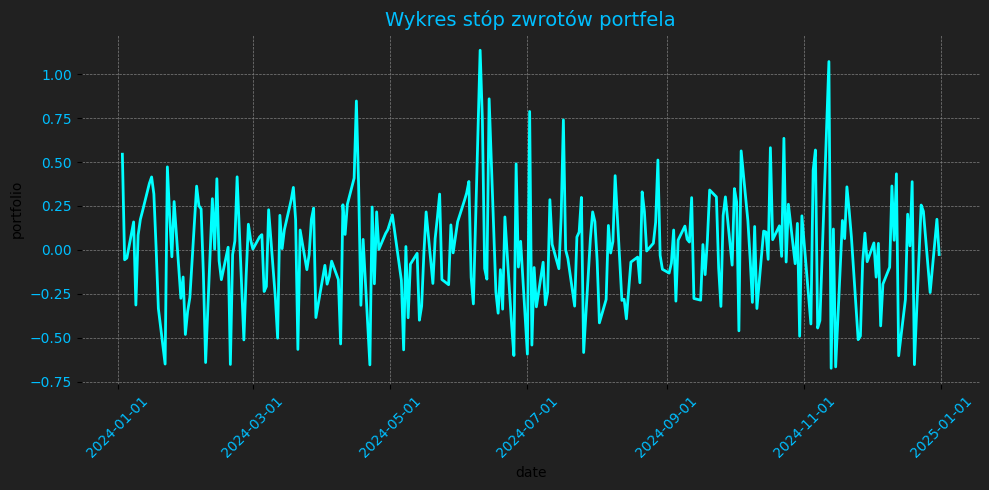

In [226]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="portfolio", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów portfela", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


Macierz korelacji

In [391]:
df[["returns_USD", "returns_EUR", "returns_GBP", "portfolio"]].corr() 

,returns_USD,returns_EUR,returns_GBP,portfolio
returns_USD,1.000000,0.723848,0.669365,0.792303
returns_EUR,0.723848,1.000000,0.716376,0.873686
returns_GBP,0.669365,0.716376,1.000000,0.959966
portfolio,0.792303,0.873686,0.959966,1.000000


Odchylenie standardowe portfela

In [392]:
portf_std = df["portfolio"].std()

print(portf_std)

0.32253949641585955


Macierz kowariancji

In [393]:
cov_matrix = df[["returns_USD", "returns_EUR", "returns_GBP"]].cov()

In [394]:
print(cov_matrix)

             returns_USD  returns_EUR  returns_GBP
returns_USD     0.280388     0.105630     0.134187
returns_EUR     0.105630     0.075949     0.074743
returns_GBP     0.134187     0.074743     0.143330


Wariancja portfela

In [395]:
portf_var = df["portfolio"].var()

print(portf_var)

0.10403172674819626


In [396]:
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

In [397]:
print(port_variance)

0.10403172674819626


Annualizowane odchylenie standardowe portfela

In [234]:
annualized_portf_std = portf_std * np.sqrt(252) * 100
print(f"Annualizowane std portfela: {annualized_portf_std:.2f}%")

Annualizowane std portfela: 512.02%


Średnia portfela

In [235]:
portf_mean = df["portfolio"].mean()

print(portf_mean)

0.004604139899080709


Semi std portfela

In [236]:
below_mean_portf = df[df['portfolio'] < portf_mean]

semi_std_portf = np.std(below_mean_portf['portfolio'], ddof=1) * 100

print(f"Semi std portfela: {semi_std_portf:.2f}%")

Semi std portfela: 19.34%


IQR portfela

In [237]:
iqr_portf = df["portfolio"].quantile(0.75) - df["portfolio"].quantile(0.25)
print(iqr_portf)

0.39581079297133837


Stacjonarność portfela

In [238]:
adfuller_test(df["portfolio"])

Statystyka testowa = -16.761, p-Value = 0.0 => Stationary. 


Histogram portfela

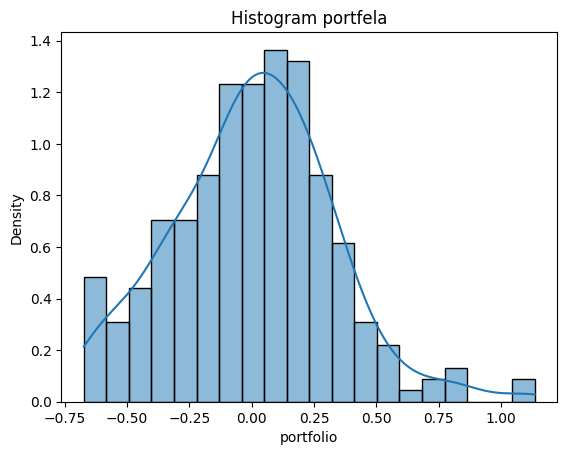

In [239]:
sns.histplot(data=df, x="portfolio", stat="density", kde = True, bins=20)
plt.title("Histogram portfela")
plt.show()

Kwantyle portfela

In [240]:
quantiles = [0.05, 0.5, 0.95, 0.975]
result_portf = df["portfolio"].quantile(q=quantiles)
result_portf = result_portf.T
result_portf.columns = [f"Q{int(q*1000)/10}" for q in quantiles]
print(result_portf)

0.050   -0.554069
0.500    0.015001
0.950    0.500417
0.975    0.713410
Name: portfolio, dtype: float64


Dystrybuanta portfela

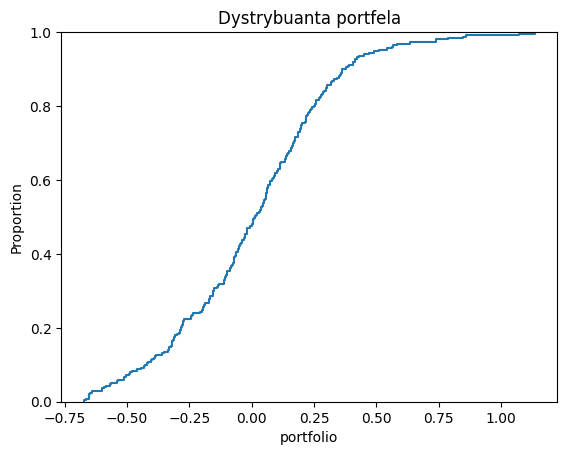

In [241]:
sns.ecdfplot(data=df, x="portfolio")
plt.title("Dystrybuanta portfela")
plt.show()

In [242]:
cdf_portfolio = pd.Series({f"F({t})": (df["portfolio"] <= t).mean() for t in thresholds}).to_frame().T

print(cdf_portfolio)

   F(-0.01)  F(-0.005)      F(0)  F(0.005)   F(0.01)
0   0.47012   0.474104  0.474104   0.49004  0.494024


Dystrybuanty dwuwymiarowe

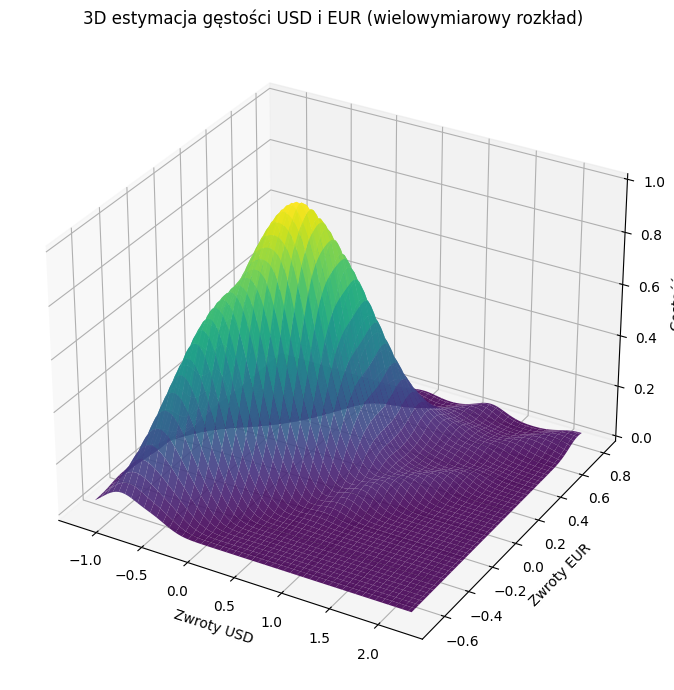

In [243]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_USD", "returns_EUR"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_USD"].min(), df["returns_USD"].max()
y_min, y_max = df["returns_EUR"].min(), df["returns_EUR"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty USD")
ax.set_ylabel("Zwroty EUR")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości USD i EUR (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

In [244]:
x_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 
y_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_USD"] <= a) & (df["returns_EUR"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"USD ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"EUR ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


              EUR ≤ -0.01  EUR ≤ -0.005   EUR ≤ 0  EUR ≤ 0.005  EUR ≤ 0.01
USD ≤ -0.01      0.382470      0.382470  0.390438     0.402390    0.406375
USD ≤ -0.005     0.386454      0.386454  0.394422     0.406375    0.410359
USD ≤ 0          0.390438      0.390438  0.398406     0.410359    0.414343
USD ≤ 0.005      0.390438      0.390438  0.398406     0.410359    0.414343
USD ≤ 0.01       0.390438      0.390438  0.398406     0.410359    0.414343


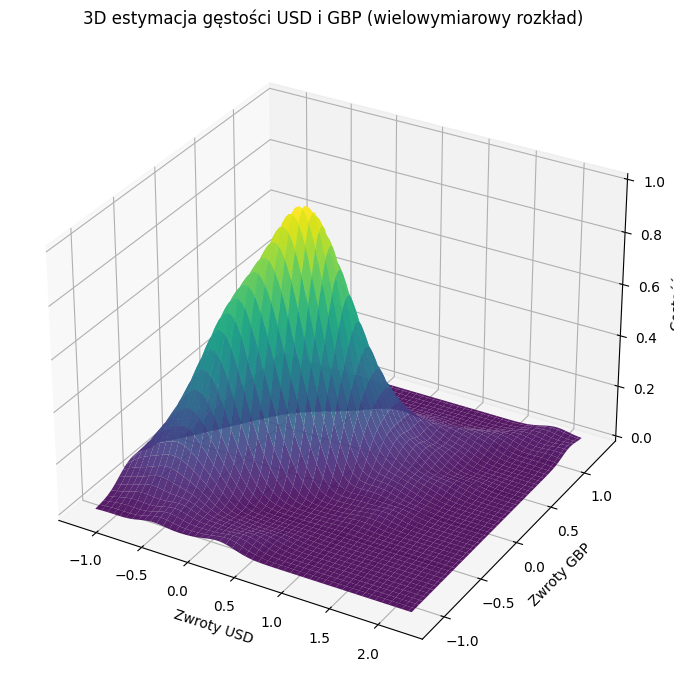

In [245]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_USD", "returns_GBP"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_USD"].min(), df["returns_USD"].max()
y_min, y_max = df["returns_GBP"].min(), df["returns_GBP"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty USD")
ax.set_ylabel("Zwroty GBP")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości USD i GBP (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

In [246]:
x_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 
y_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_USD"] <= a) & (df["returns_GBP"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"USD ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"GBP ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


              GBP ≤ -0.01  GBP ≤ -0.005   GBP ≤ 0  GBP ≤ 0.005  GBP ≤ 0.01
USD ≤ -0.01      0.354582      0.362550  0.370518     0.374502    0.374502
USD ≤ -0.005     0.354582      0.362550  0.370518     0.374502    0.374502
USD ≤ 0          0.358566      0.366534  0.378486     0.382470    0.382470
USD ≤ 0.005      0.358566      0.366534  0.378486     0.382470    0.382470
USD ≤ 0.01       0.366534      0.374502  0.386454     0.390438    0.390438


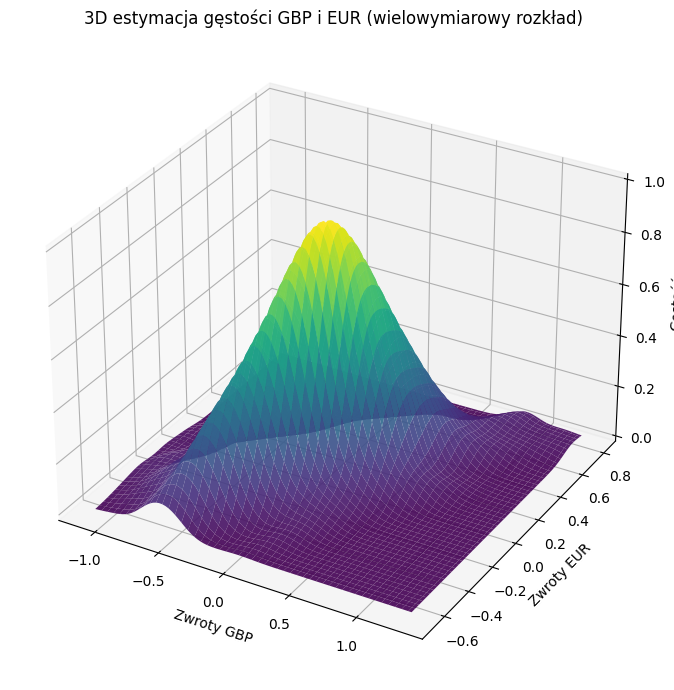

In [247]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_GBP", "returns_EUR"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_GBP"].min(), df["returns_GBP"].max()
y_min, y_max = df["returns_EUR"].min(), df["returns_EUR"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty GBP")
ax.set_ylabel("Zwroty EUR")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości GBP i EUR (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

In [248]:
x_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 
y_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_EUR"] <= a) & (df["returns_GBP"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"EUR ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"GBP ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


              GBP ≤ -0.01  GBP ≤ -0.005   GBP ≤ 0  GBP ≤ 0.005  GBP ≤ 0.01
EUR ≤ -0.01      0.350598      0.354582  0.362550     0.366534    0.366534
EUR ≤ -0.005     0.350598      0.354582  0.362550     0.366534    0.366534
EUR ≤ 0          0.362550      0.366534  0.374502     0.378486    0.378486
EUR ≤ 0.005      0.366534      0.374502  0.382470     0.386454    0.386454
EUR ≤ 0.01       0.370518      0.378486  0.386454     0.390438    0.390438


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,3.330126,422.932457,433.508816,inf,0.041357,7.678090e-01
gamma,3.340475,426.309953,436.886312,inf,0.043682,7.075030e-01
beta,3.356264,424.226003,438.327814,inf,0.044583,6.835816e-01
norm,3.489463,489.891430,496.942336,inf,0.056416,3.870221e-01
expon,12.667918,322.627189,329.678095,inf,0.307209,1.578258e-21


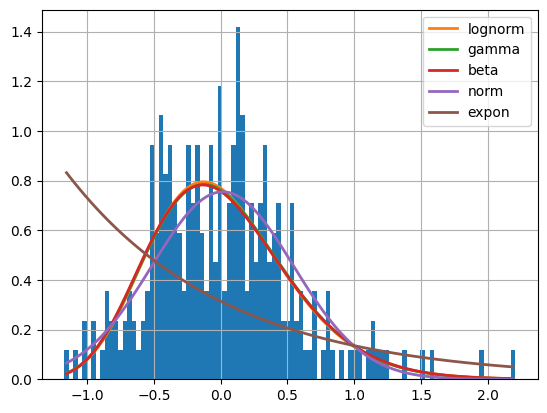

In [249]:
from fitter import Fitter

# Dane
data = df["returns_USD"].dropna()

# Dopasowanie wielu rozkładów na raz
f = Fitter(data, distributions=['norm', 'lognorm', 'expon', 'gamma', 'beta'])
f.fit()

# Wyniki
f.summary()

In [250]:
print(f.get_best())

{'lognorm': {'s': 0.19005182341670143, 'loc': -2.721862237140897, 'scale': 2.6883922902985726}}


In [251]:
from scipy.stats import lognorm

shape, loc, scale = lognorm.fit(data)

# Średnia i std log-normalnego
mean = scale * np.exp(shape**2 / 2)
std_dev = scale * np.sqrt((np.exp(shape**2) - 1) * np.exp(shape**2))

print(f"Średnia (lognormal): {mean:.4f}")
print(f"Odchylenie standardowe (lognormal): {std_dev:.4f}")

Średnia (lognormal): 2.7374
Odchylenie standardowe (lognormal): 0.5250


In [252]:
from scipy.stats import norm
import numpy as np

# Dopasowanie rozkładu normalnego
mu, std = norm.fit(data)  # Estymacja parametrów normalnego rozkładu

# Średnia i odchylenie standardowe dla rozkładu normalnego
mean_normal = mu
std_normal = std
variance_normal = std**2
median_normal = mu  # Mediana to średnia dla normalnego rozkładu
skewness_normal = 0  # Skośność rozkładu normalnego
kurtosis_normal = 0  # Kurtoza rozkładu normalnego

print(f"Średnia (Normalny): {mean_normal:.4f}")
print(f"Odchylenie standardowe (Normalny): {std_normal:.4f}")
print(f"Wariancja (Normalny): {variance_normal:.4f}")
print(f"Mediana (Normalny): {median_normal:.4f}")
print(f"Skośność (Normalny): {skewness_normal:.4f}")
print(f"Kurtoza (Normalny): {kurtosis_normal:.4f}")

Średnia (Normalny): 0.0157
Odchylenie standardowe (Normalny): 0.5285
Wariancja (Normalny): 0.2793
Mediana (Normalny): 0.0157
Skośność (Normalny): 0.0000
Kurtoza (Normalny): 0.0000


In [253]:
mean_sample = np.mean(data)
std_sample = np.std(data)

print(f"Średnia próbki: {mean_sample:.4f}")
print(f"Odchylenie standardowe próbki: {std_sample:.4f}")

Średnia próbki: 0.0157
Odchylenie standardowe próbki: 0.5285


In [254]:
stat_ks, p_value_ks = stats.kstest(data, 'norm')
print(f"Test Kolmogorova-Smirnova: Statystyka = {stat_ks:.4f}, p-wartość = {p_value_ks:.4f}")

Test Kolmogorova-Smirnova: Statystyka = 0.1916, p-wartość = 0.0000
